In [3]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

wine = pd.read_csv("winequalityred.csv")
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
## Following is just regular split - Need to do stratified split in next revision
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(wine, test_size=0.2, random_state=42)
print("train size %s, test size %s"%(train_set.shape,test_set.shape))

train size (1279, 12), test size (320, 12)


In [11]:
## Check out the train set
## Checking out for any NAN value
train_set.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

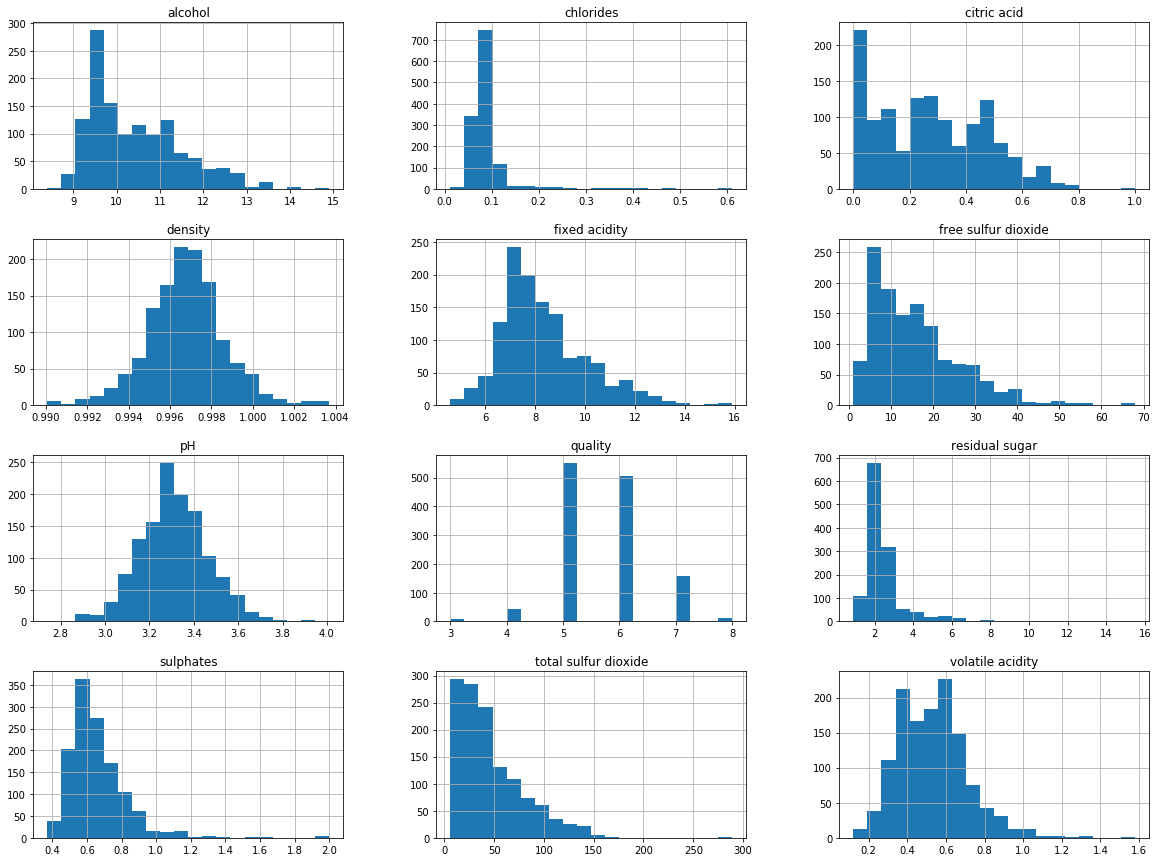

In [14]:
%matplotlib inline
train_set.hist(bins=20, figsize=(20,15))
plt.show()

In [29]:
train_set['quality'].value_counts()

5    551
6    506
7    157
4     43
8     13
3      9
Name: quality, dtype: int64

In [33]:
## Find correlation
corr_matrix = train_set.corr()
corr_matrix["quality"].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.472676
sulphates               0.242596
citric acid             0.216115
fixed acidity           0.122488
residual sugar          0.005425
pH                     -0.045185
free sulfur dioxide    -0.055860
chlorides              -0.126541
density                -0.167091
total sulfur dioxide   -0.200067
volatile acidity       -0.378372
Name: quality, dtype: float64

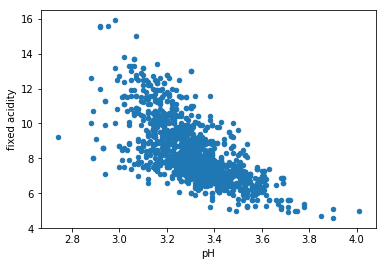

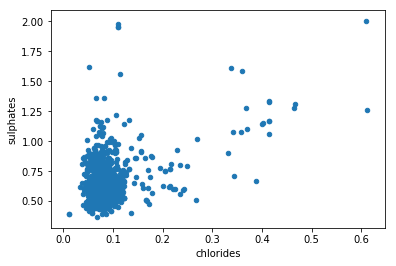

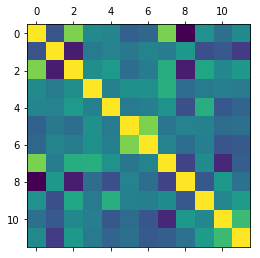

In [51]:
## Obsrv - PH and Fixed Acidity has negative correlation
## Obsrv - sulphates and chlorides have positive correlation
train_set.plot(kind="Scatter", x="pH", y="fixed acidity") 
train_set.plot(kind="Scatter", x="chlorides", y="sulphates") 
plt.matshow(corr_matrix)
plt.show()

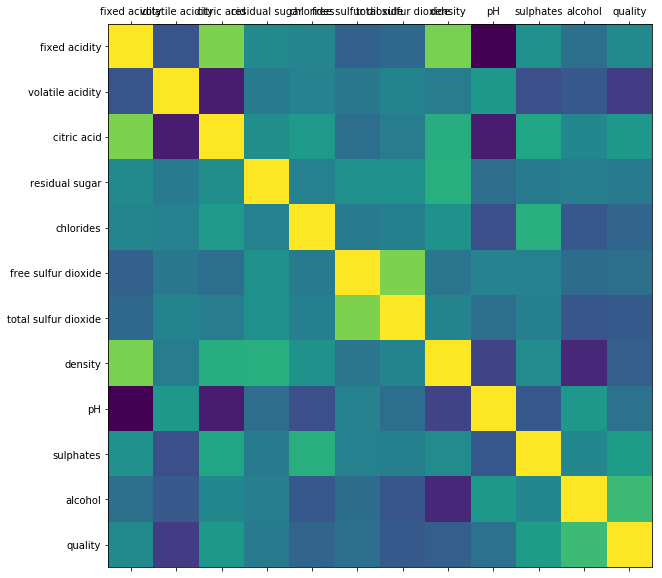

In [62]:
##Anotherway of showing correlation matrix
def plot_corr(df,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);
    
plot_corr(train_set)

In [77]:
##Taking all the columns for modelling
x_train = train_set.drop('quality',axis=1)
y_train = train_set['quality']
x_test =  test_set.drop('quality',axis=1)
y_test = test_set['quality']
print("x_train size %s, y_train %s"%(x_train.shape,y_train.shape))
print("x_test size %s, y_test %s"%(x_test.shape,y_test.shape))
y_train = list(y_train)
y_test = list(y_test)


x_train size (1279, 11), y_train (1279,)
x_test size (320, 11), y_test (320,)


In [79]:
## Scaling all the feature
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(x_train)


x_train = scaler.transform(x_train)  
x_test = scaler.transform(x_test)  
print(x_test)

[[-3.61859850e-01  1.64286407e-01 -9.85152962e-01 ... -4.65392578e-01
  -1.34389336e-04 -7.77452782e-01]
 [-3.03840702e-01 -1.70525408e-01 -5.24491803e-01 ...  5.08915214e-01
  -1.03143815e+00 -8.72484283e-01]
 [ 1.37871461e+00  7.78108067e-01 -2.68568937e-01 ... -2.05577167e-01
   1.83329452e+00 -4.92358280e-01]
 ...
 [-1.37449586e-02  3.87494284e-01 -1.15015218e-01 ... -1.04997725e+00
  -7.44964886e-01 -5.87389780e-01]
 [ 2.76350785e-01 -1.45397070e+00  6.01568807e-01 ... -1.04997725e+00
   1.71749571e-01  7.43051230e-01]
 [ 4.50408230e-01  1.30822677e+00 -1.18989125e+00 ... -1.40623314e-01
  -6.87670232e-01 -6.82421281e-01]]


In [80]:
##training and prediction
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=6)  
classifier.fit(x_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [81]:
##prediction
y_pred = classifier.predict(x_test)  

In [83]:
##Evaluate the Algorithm
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 

[[ 0  0  0  1  0  0]
 [ 0  1  3  6  0  0]
 [ 0  1 94 34  1  0]
 [ 0  1 53 70  8  0]
 [ 0  1  6 22 13  0]
 [ 0  0  0  0  5  0]]
             precision    recall  f1-score   support

          3       0.00      0.00      0.00         1
          4       0.25      0.10      0.14        10
          5       0.60      0.72      0.66       130
          6       0.53      0.53      0.53       132
          7       0.48      0.31      0.38        42
          8       0.00      0.00      0.00         5

avg / total       0.53      0.56      0.54       320



C:\Users\rajee\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [94]:
##Printing y_test and y_pred together
y_test_pred = pd.DataFrame({'y_test':y_test,
                            'y_pred': y_pred}, columns=['y_test','y_pred'])
len(y_test_pred[y_test==y_pred]) + len(y_test_pred[y_test!=y_pred])
##y_test_pred.loc[y_test!=y_pred].count()

320